<a href="https://colab.research.google.com/github/Kambey-san/NNWs_Basic/blob/HW_lesson_03/HW_Lesson_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)


2.12.0
TensorFlow 2.0 Hello World


In [8]:
!pip install -q -U keras-tuner

In [9]:
# from __future__ import absolute_import,division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model
#Helper libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score

print(tf.__version__)

2.12.0


## Импортируем Fashion MNIST датасет

In [10]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = (train_images / 255)
test_images = (test_images / 255)

# Flatten.
X_train_images = train_images.reshape((-1, 784)) # можно использовать np.ravel()
X_test_images = test_images.reshape((-1, 784))

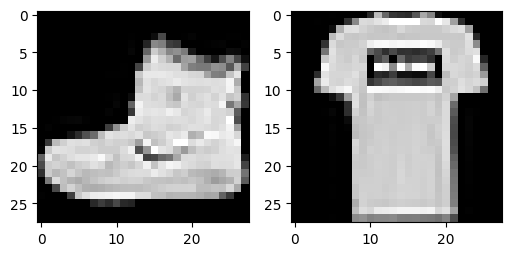

In [11]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
])
config = model.get_config()
model.save_weights('fashion_weights.h5')

313/313 - 1s - loss: 0.3412 - accuracy: 0.8932 - 796ms/epoch - 3ms/step

Test accuracy: 0.8931999802589417
313/313 [==============================] - 1s 2ms/step


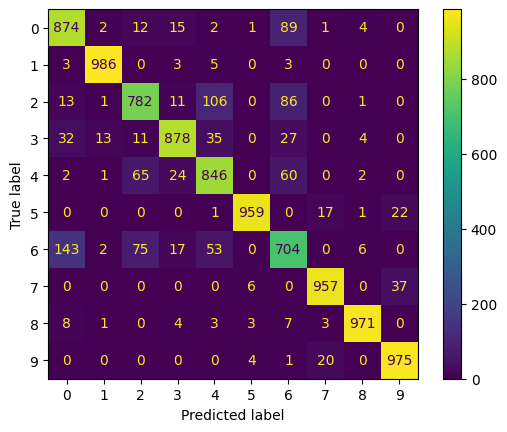

In [14]:
import os, time
model = model.from_config(config)
model.load_weights('fashion_weights.h5')
root_logdir = os.path.join(os.curdir, "MNIST_logs")

def get_run_logdir():
    """
    This function creates a subdirectory path on
    every run based on current date and time.
    """
    run_id = time.strftime("run_%H%M%S-%Y%m%d")
    return os.path.join(root_logdir, run_id)

# Path after run
run_logdir = get_run_logdir()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train_images, train_labels, batch_size = 250, epochs=25, verbose=0, callbacks=[tensorboard_cb])
test_loss, test_acc = model.evaluate(X_test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test_images)
y_pred = np.argmax(predictions, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [15]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [16]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.813, полнота - 0.874
Класс - 1, точность - 0.980, полнота - 0.986
Класс - 2, точность - 0.828, полнота - 0.782
Класс - 3, точность - 0.922, полнота - 0.878
Класс - 4, точность - 0.805, полнота - 0.846
Класс - 5, точность - 0.986, полнота - 0.959
Класс - 6, точность - 0.721, полнота - 0.704
Класс - 7, точность - 0.959, полнота - 0.957
Класс - 8, точность - 0.982, полнота - 0.971
Класс - 9, точность - 0.943, полнота - 0.975


In [17]:
# %load_ext tensorboard
# %tensorboard --logdir=./MNIST_logs --port=6006

In [18]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.3114 - accuracy: 0.8904 - 858ms/epoch - 3ms/step

Test accuracy: 0.8903999924659729
313/313 [==============================] - 1s 3ms/step


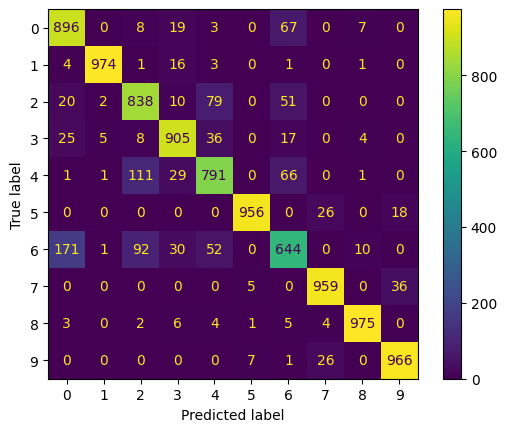

In [19]:
import os, time

root_logdir = os.path.join(os.curdir, "MNIST_logs")

def get_run_logdir():
    """
    This function creates a subdirectory path on
    every run based on current date and time.
    """
    run_id = time.strftime("run_%H%M%S-%Y%m%d")
    return os.path.join(root_logdir, run_id)

# Path after run
run_logdir = get_run_logdir()

model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model1.fit(X_train_images, train_labels, batch_size = 250, epochs=25, verbose=0, callbacks=[tensorboard_cb])
test_loss, test_acc = model1.evaluate(X_test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model1,
                                         tf.keras.layers.Softmax()])
predictions1 = probability_model.predict(X_test_images)
y_pred1 = np.argmax(predictions1, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred1)

In [20]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred1, labels=labels, average=None)
  recall = recall_score(y_true, y_pred1, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [21]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.800, полнота - 0.896
Класс - 1, точность - 0.991, полнота - 0.974
Класс - 2, точность - 0.791, полнота - 0.838
Класс - 3, точность - 0.892, полнота - 0.905
Класс - 4, точность - 0.817, полнота - 0.791
Класс - 5, точность - 0.987, полнота - 0.956
Класс - 6, точность - 0.756, полнота - 0.644
Класс - 7, точность - 0.945, полнота - 0.959
Класс - 8, точность - 0.977, полнота - 0.975
Класс - 9, точность - 0.947, полнота - 0.966


In [22]:
# %load_ext tensorboard
# %tensorboard --logdir=./MNIST_logs --port=6005

313/313 - 1s - loss: 0.3339 - accuracy: 0.8936 - 759ms/epoch - 2ms/step

Test accuracy: 0.8935999870300293
313/313 [==============================] - 1s 2ms/step
313/313 - 1s - loss: 0.3293 - accuracy: 0.8934 - 734ms/epoch - 2ms/step

Test accuracy: 0.8934000134468079
313/313 [==============================] - 1s 2ms/step
0.9004
Класс - 0, точность - 0.800, полнота - 0.896
Класс - 1, точность - 0.991, полнота - 0.974
Класс - 2, точность - 0.791, полнота - 0.838
Класс - 3, точность - 0.892, полнота - 0.905
Класс - 4, точность - 0.817, полнота - 0.791
Класс - 5, точность - 0.987, полнота - 0.956
Класс - 6, точность - 0.756, полнота - 0.644
Класс - 7, точность - 0.945, полнота - 0.959
Класс - 8, точность - 0.977, полнота - 0.975
Класс - 9, точность - 0.947, полнота - 0.966
None


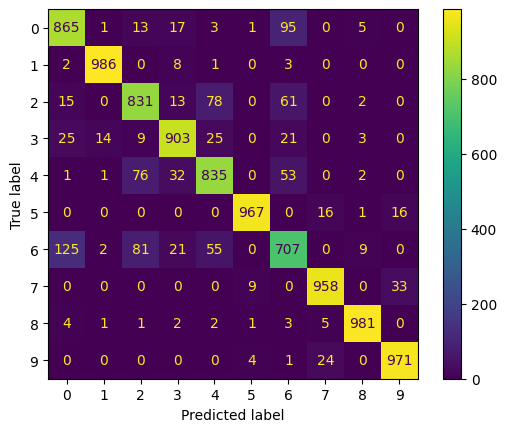

In [23]:
# Создаем словарь который будет содержать модель сети и параметры для обучения
models = dict()
models[0] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='relu', name='hiden_two'),
    keras.layers.Dense(64, activation='tanh', name='hiden_three'),
    keras.layers.Dense(64, activation='relu', name='hiden_four'),
    keras.layers.Dense(10, name='output')
]), tf.keras.optimizers.Adam(learning_rate=0.001), 250]
models[1] = [keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name='input'),
    keras.layers.Dense(256, activation='relu', name='hiden_one'),
    keras.layers.Dense(128, activation='gelu', name='hiden_two'),
    keras.layers.Dense(64, activation='sigmoid', name='hiden_three'),
    keras.layers.Dense(64, activation='selu', name='hiden_four'),
    keras.layers.Dense(10, name='output')]), tf.keras.optimizers.AdamW(learning_rate=0.001), 450]
# Список для сохранения результатов
result = list()
# Формируем сеть.
for key, param in models.items():
  # Загружаем параметры
  model, opt, batch = param[0], param[1], param[2]
  # Загружаем входные веса, чтобы хоть как-то "уравнять" результаты работы
  model.load_weights('fashion_weights.h5')
  model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  model.fit(train_images, train_labels, batch_size=batch, epochs=25, verbose=0)
  # Получаем предварительную метрику
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print('\nTest accuracy:', test_acc)
  probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
  # Сохраняем массив с вероятностями
  result.append(probability_model.predict(test_images))
# Получаем финишное предсказание суммируя два массива с вероятностями
y_pred = np.argmax(sum(result), axis=1)
# Окончательная метрика качества
print(accuracy_score(test_labels, y_pred))
# Распределение предсказаний по классам
print(recall_precision(test_labels, y_pred))
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)


In [24]:
import numpy as np
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

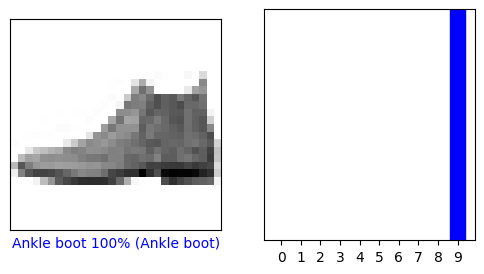

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

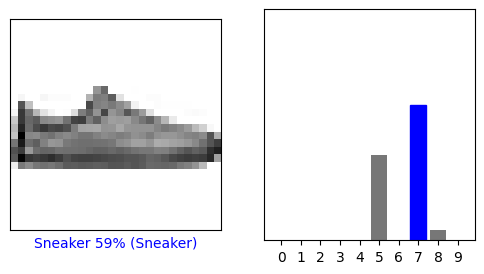

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


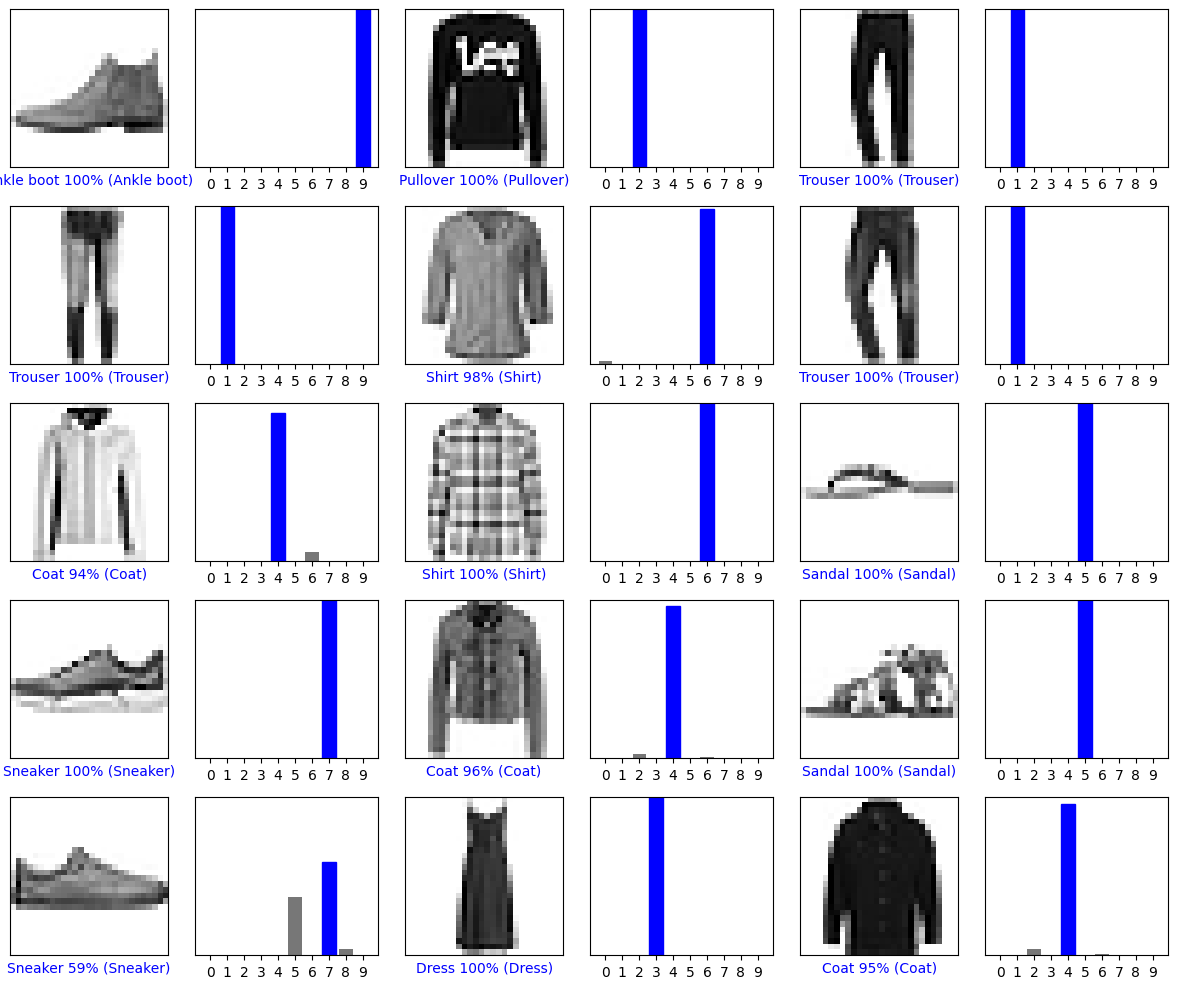

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
print(class_names)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization

<ipython-input-28-7bfa21a06567>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils

In [30]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [31]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train / 255
x_test = x_test / 255
y_train = utils.to_categorical(y_train, 10)
#y_test = utils.to_categorical(y_test, 2)

In [32]:
def build_model(hp):
    model = Sequential()
    activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])
    model.add(Dense(units=hp.Int('units_input',    # Полносвязный слой с разным количеством нейронов
                                   min_value=512,    # минимальное количество нейронов - 128
                                   max_value=1024,   # максимальное количество - 1024
                                   step=32),
                    input_dim=784,
                    activation=activation_choice))
    model.add(Dense(units=hp.Int('units_hidden',
                                   min_value=128,
                                   max_value=600,
                                   step=32),
                    activation=activation_choice))
    model.add(Dense(10, activation='softmax'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [33]:
tuner = RandomSearch(
    build_model,                 # функция создания модели
    objective='val_accuracy',    # метрика, которую нужно оптимизировать -
                                 # доля правильных ответов на проверочном наборе данных
    max_trials=80,               # максимальное количество запусков обучения
    directory='test_directory'   # каталог, куда сохраняются обученные сети
    )

In [34]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': 'linear'}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [35]:
tuner.search(x_test,                  # Данные для обучения
             y_train,                  # Правильные ответы
             batch_size=256,           # Размер мини-выборки
             epochs=25,                # Количество эпох обучения
             validation_split=0.2,     # Часть данных, которая будет использоваться для проверки
             )

In [36]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
activation: selu
units_input: 1024
units_hidden: 512
optimizer: SGD
Score: 0.8578333258628845

Trial 08 summary
Hyperparameters:
activation: selu
units_input: 512
units_hidden: 288
optimizer: adam
Score: 0.125

Trial 46 summary
Hyperparameters:
activation: selu
units_input: 864
units_hidden: 288
optimizer: rmsprop
Score: 0.11900000274181366

Trial 65 summary
Hyperparameters:
activation: selu
units_input: 512
units_hidden: 384
optimizer: rmsprop
Score: 0.11749999970197678

Trial 61 summary
Hyperparameters:
activation: elu
units_input: 608
units_hidden: 544
optimizer: rmsprop
Score: 0.11699999868869781

Trial 45 summary
Hyperparameters:
activation: tanh
units_input: 608
units_hidden: 384
optimizer: rmsprop
Score: 0.11699999868869781

Trial 77 summary
Hyperparameters:
activation: sigmoid
units_input: 864
units_hidden: 576
opti

In [37]:
models = tuner.get_best_models(num_models=1)

In [38]:
for model_opt in models:
  model_opt.summary()
  print()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________



In [39]:
# Evaluate the model.
# как посмотреть сразу? ХЗ

In [40]:
# # Строим модель по этим параметрам

In [50]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,), name='input'),
    keras.layers.Dense(1024, activation='relu', name='hiden_one'),
    keras.layers.Dense(512, activation='relu', name='hiden_two'),
    keras.layers.Dense(10, activation='softmax', name='output')
])

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - loss: 0.3114 - accuracy: 0.8904 - 634ms/epoch - 2ms/step

Test accuracy: 0.8903999924659729
313/313 [==============================] - 1s 2ms/step


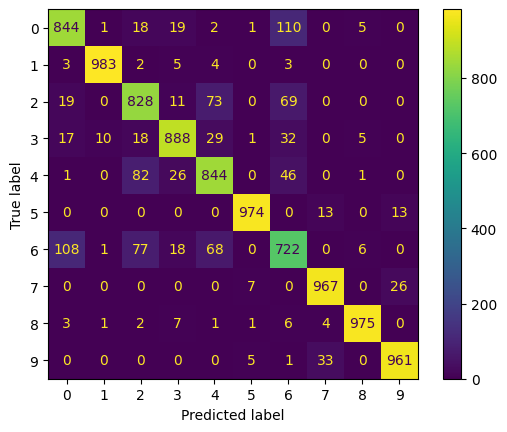

In [56]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model3.fit(X_train_images, train_labels, batch_size = 256, epochs=25, verbose=0)
test_loss, test_acc = model1.evaluate(X_test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
  # Получим предсказания
probability_model = tf.keras.Sequential([model3,
                                         tf.keras.layers.Softmax()])
predictions3 = probability_model.predict(X_test_images)
y_pred3 = np.argmax(predictions3, axis=1)
# Посмотрим на результаты
ConfusionMatrixDisplay.from_predictions(test_labels, y_pred3)

In [57]:
def recall_precision(y_true, y_pred3, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred3, labels=labels, average=None)
  recall = recall_score(y_true, y_pred3, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [58]:
recall_precision(test_labels, y_pred3)

Класс - 0, точность - 0.848, полнота - 0.844
Класс - 1, точность - 0.987, полнота - 0.983
Класс - 2, точность - 0.806, полнота - 0.828
Класс - 3, точность - 0.912, полнота - 0.888
Класс - 4, точность - 0.827, полнота - 0.844
Класс - 5, точность - 0.985, полнота - 0.974
Класс - 6, точность - 0.730, полнота - 0.722
Класс - 7, точность - 0.951, полнота - 0.967
Класс - 8, точность - 0.983, полнота - 0.975
Класс - 9, точность - 0.961, полнота - 0.961


**Вывод:** используя Keras Tuner, удалось незначительно увеличить "полноту" класса-6